<a href="https://colab.research.google.com/github/TTL30/PPE-Deep-Distribituion-Regression/blob/master/PPE_Deep_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Première étape : Importation des librairies


1.   TensorFlow
2.   Numpy
3.   Matlplot


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#Deuxième étape : Récupération des données

On récupére les données provenant du concours GEFCOM 2014.\
6000 datas pour le jeux de training et 1000 pour celui de test.\
Solar energy forcasting dataset : 
* Solar power outputs, and 12 weather forcasts variables :
* surface solar radiance
* net solar radiation
* surface thermal radiation
* temperature
* total cloud coverage
* precipitation
* total column liquid water
* total column ice water
* relative humidity
* surface pressure
* 10-meter U wind component
* 10-meter V wind component


In [ ]:
(train_datas, train_labels) = ##GEFCOM DATAS
(test_datas, test_labels) = ##GEFCOM DATAS

##Étape + :  Processing les datas
En fonction des données récupérés et de la forme des ces dernières, on les unifie, clean...\
Page 12 : "We preprocessed the data to include additional variables that are commonly used in solar energy forecasting, such as indicator variables for each solar farm and hour of the day. We also created sine and cosine
transformations for the date of the year, as solar energy output shows strong seasonality"
 

In [ ]:
(train_datas, train_labels) = (train_datas, train_labels) / ##Process
(test_datas, test_labels) = (test_datas, test_labels) / ##Process

#Troisième étape : Création du modèle 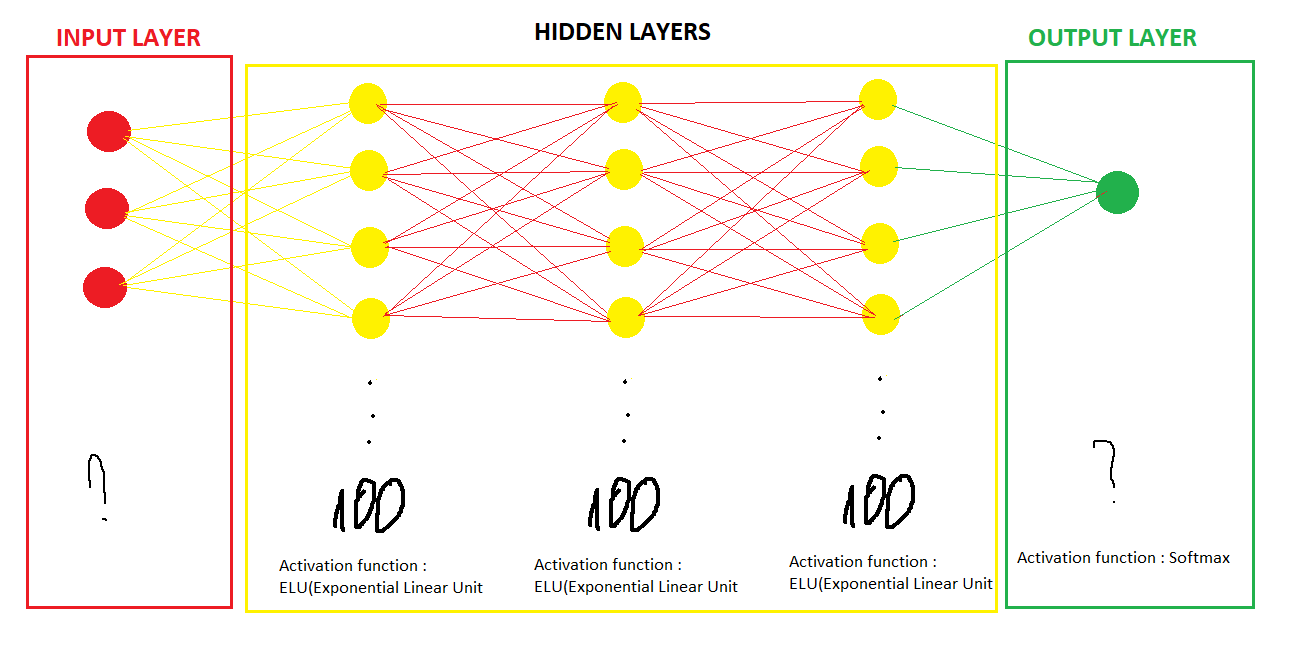

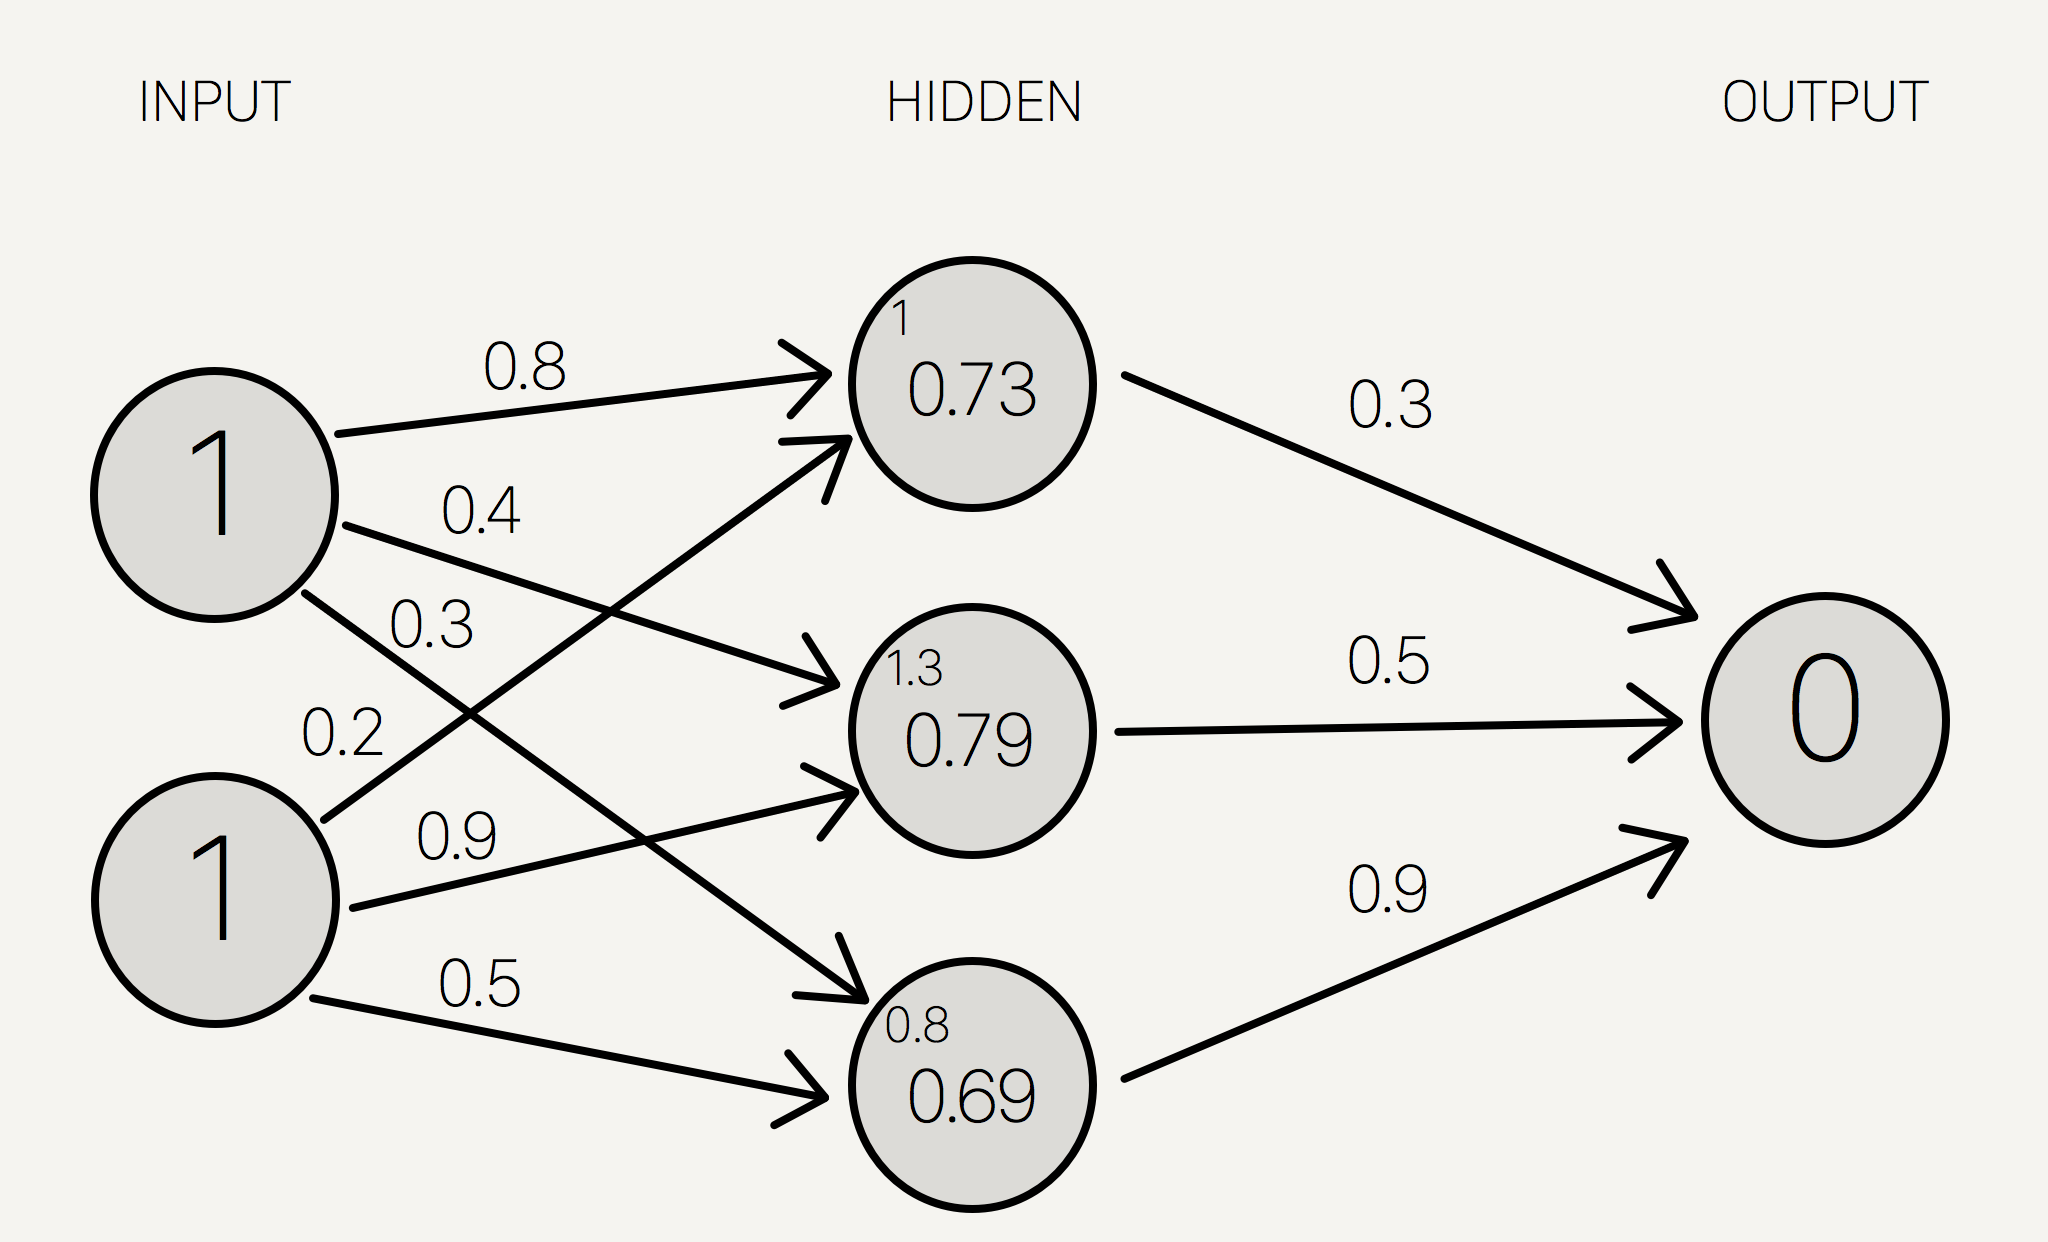





*   Déterminer les données qui rentrent : ce sont les paramètres de notre NN
*   Déterminer les données qui sortent, sous quelle forme : Objectif : predict the conditional distribution of solar power output / voir figure 3 page 14 solar power prediction


In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(13,)), # input layer 
    keras.layers.Dense(100, activation='elu'),  # hidden layer (1)
    keras.layers.Dense(100, activation='elu'),  # hidden layer (2)
    keras.layers.Dense(100, activation='elu'),  # hidden layer (3)
    keras.layers.Dense(1, activation='softmax') # output layer
])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 100)               1400      
_________________________________________________________________
dense_24 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_25 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 101       
Total params: 21,701
Trainable params: 21,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics = ['accuracy'])

#Quatrième étape : Entrainement du modèle

In [ ]:
model.fit(train_images, train_labels)

#Cinquième étape : Évaluation du modèle

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)